## Principal Component Analysis (PCA)

- Pros:
    - Usefull as a tool for dimensionality reduction, visualization, noise filtering, feature extraction
    - Fast (Randomized PCA)
- Cons:
    - Affected by outliers -> Exist robust variants of PCA
    - Does not perform well when there are non-linear relationship within data


- One of the most broady used for unsupervised learning
- When dealing with large high-dimensional data, good idea to start with PCA to visualize the eighvectors & relationship between points(2D visu.)
- **WARNING**: For PCA to work well, do not forget the preprocess the features to that the mean = 0 and variance = 1

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

/Users/nicolas/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Components: 
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
Explained variance: 
[0.7625315 0.0184779]
PCA mean: 
[ 0.03351168 -0.00408072]
--------------------------------------------------
Components: 
[[1. 0.]
 [0. 1.]]
Explained variance: 
[0.7625315 0.0184779]
PCA mean: 
[1.24900090e-17 3.46944695e-18]


/Users/nicolas/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


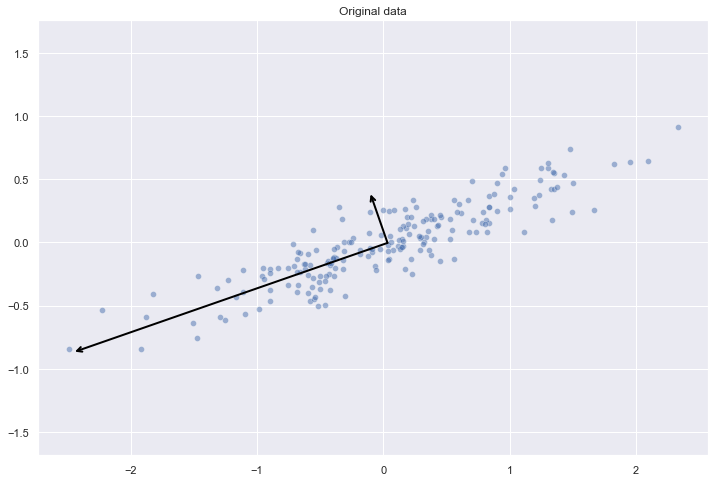

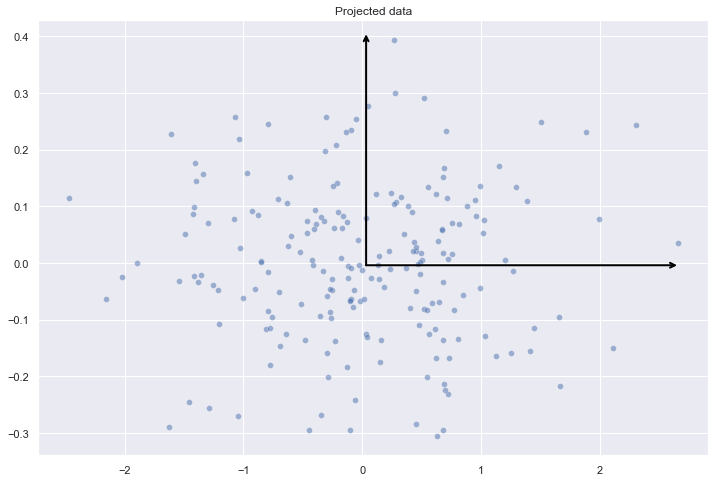

In [2]:
# Introduction

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T # Matrix multiplication
fig, ax = plt.subplots(figsize = (12, 8))
sns.scatterplot(X[:, 0], X[:, 1], ax=ax, alpha=0.5)
ax.axis("equal"); # Set equal scaling (make circles circular)

# Nearly linear relationship between x and y features

# Linear Regression = Try to PREDICT y from x
# PCA = Try to learn relationship between x and y
#       Quantify the relationship by finding a list of "principal axes" in the data
#       Use those "principal axes" to describe the dataset


# Create PCA model
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # Number of components to keep
pca.fit(X)
# The PCA models learns two quantities from the data:
# - "components":
# - "explained variance"
print(f"Components: \n{pca.components_}") # "principal axes" coordonates
print(f"Explained variance: \n{pca.explained_variance_}")
print(f"PCA mean: \n{pca.mean_}") # "principal axes" cross

# Visualization of "components" and "explained variance"
def draw_vector(x0, x1, ax=None):
    ax = ax or plt.gca() # Get the current Axes or create it if necessary
    arrowprops = {"arrowstyle": "->",
                  "linewidth": 2,
                  "color": "black",
                  "shrinkA": 0, # Do not shrink the array. By default shrink by 2
                  "shrinkB": 0}
    ax.annotate('', # empty test
                x1, # x-coordonate of the start of the arrow
                x0, # y-coordonate of the start of the arrow
                arrowprops=arrowprops
               )

ax.set_title("Original data")
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = 3* vector * np.sqrt(length) # Scale the "principal axes" by their standard error
    draw_vector(pca.mean_, pca.mean_ + v)
    
# The length of the "principal axes" indicates how important the axis is in describing the distribution of the data
# More precisely, it is a measure of the variance of the data when projected onto that axis

# Plot the data after dimensionality reduction (i.e. in the new coordonate system)
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Projected data")
X_pca = pca.transform(X)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], alpha=0.5)


# Get the "principal axis" of the transformed data
pca_2 = PCA(n_components=2) # Number of components to keep
pca_2.fit(X_pca)
print("-"*50)
print(f"Components: \n{pca_2.components_}") # "principal axes" coordonates
print(f"Explained variance: \n{pca_2.explained_variance_}")
print(f"PCA mean: \n{pca_2.mean_}") # "principal axes" cross

for length, vector in zip(pca_2.explained_variance_, pca_2.components_):
    v = 3 * vector * np.sqrt(length) # Scale the "principal axes" by their standard error
    draw_vector(pca.mean_, pca.mean_ + v)

In [37]:
# Notice that the PCA transformation is an affine transformation:
# it is composed of translation, rotation and scaling only.

X Original shape: (200, 2)
X Transformed shape: (200, 1)
--------------------------------------------------
X Transformed shape: (200, 1)
X Inverse Transformed shape: (200, 2)


/Users/nicolas/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/nicolas/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

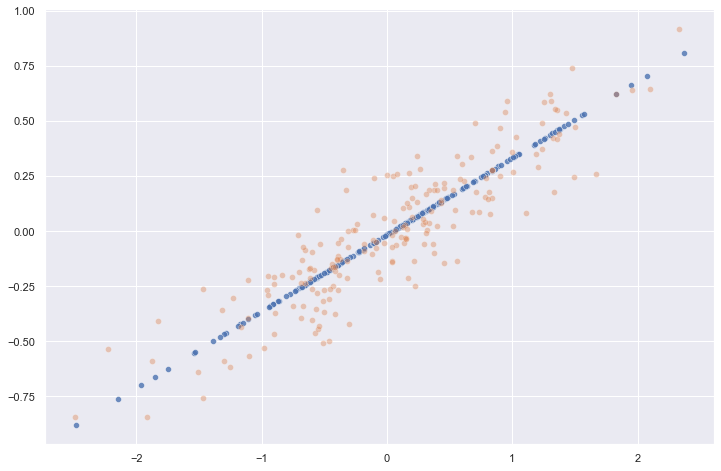

In [9]:
## PCA as dimensionality reduction
# N-Dimension -> M-Dimension, M < N while preserving maximal data variance

pca = PCA(n_components=1)
pca.fit(X)

# Transform 2D data to 1D data
X_pca = pca.transform(X)
print(f"X Original shape: {X.shape}")
print(f"X Transformed shape: {X_pca.shape}")
print("-"*50)

# Transform back 1D data to 2D data
X_original = pca.inverse_transform(X_pca)
print(f"X Transformed shape: {X_pca.shape}")
print(f"X Inverse Transformed shape: {X_original.shape}") # Warning: X_original is 2D but the data has been projected !

# Plot transformed and inverse transformed data
fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(X_original[:, 0], X_original[:, 1], alpha = 0.8, ax=ax)
sns.scatterplot(X[:, 0], X[:, 1], alpha = 0.4, ax=ax)

# Information along the least important pricipal axes is removed

In [22]:
sns.scatterplot?

Shape of original images: (1797, 64)
Shape of projected images: (1797, 2)


/Users/nicolas/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


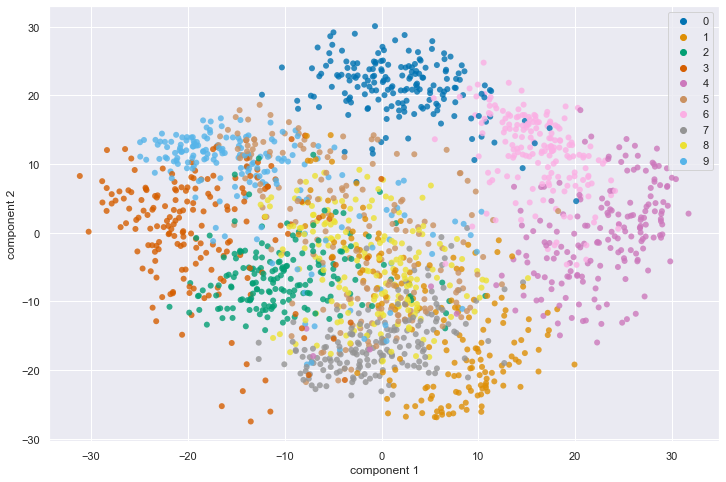

In [180]:
## PCA for visualization

from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape # 1'797 image of 64 pixels each -> 64 features for each sample

# Projects samples to a 2D grid
pca = PCA(n_components=2)
pca.fit(digits.data)
digits_projected = pca.transform(digits.data)

print(f"Shape of original images: {digits.data.shape}")
print(f"Shape of projected images: {digits_projected.shape}")

# Plots the projected images
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(digits_projected[:, 0], digits_projected[:, 1],
                hue = digits.target,
                edgecolor='none',
                palette='colorblind',
                alpha=0.8
                )
ax.set_xlabel("component 1")
ax.set_ylabel("component 2");

#### What do the components mean ?

x = one sample

x = [x1, x2, ..., x64]

image(x) = x\*pixel_1(top-left corner pixel) + x2\*pixel_2 + ... + x64\*pixel_64

- Instead of using pixels as the basis, we can choose another function which contain some pre-defined contribution from each pixel

image(x) = mean + x1\*basis_1 + x2\*basis_2 + ... + x64\*basis_64

- PCA can be thought of as a process of choosing optimal basis function such that adding together just the first few of them (e.g. until basis_2) is enough to suitably reconstruct the bulk of the elements in the dataset

/Users/nicolas/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


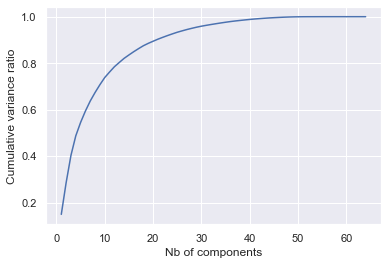

In [78]:
# Choosing the nb of components

# -> Look at the cumulative explained ratio
pca = PCA() # if n_components not speficiy, keep all dimensions
pca.fit(digits.data)
plot = sns.lineplot(np.arange(1, len(pca.explained_variance_ratio_)+1),
                     np.cumsum(pca.explained_variance_ratio_))
plot.set(xlabel = "Nb of components",
         ylabel = 'Cumulative variance ratio');

In [83]:
digits.images.shape

(1797, 8, 8)

Nb of PCA components to keep >= 50% of variance 12


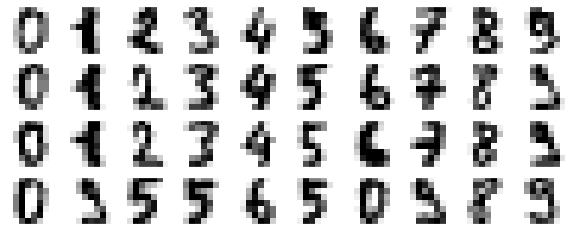

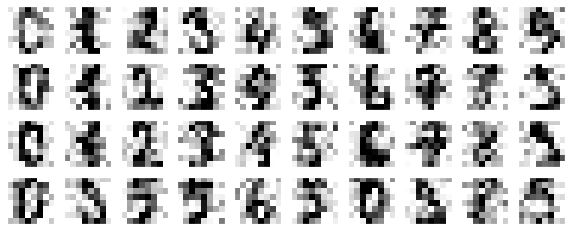

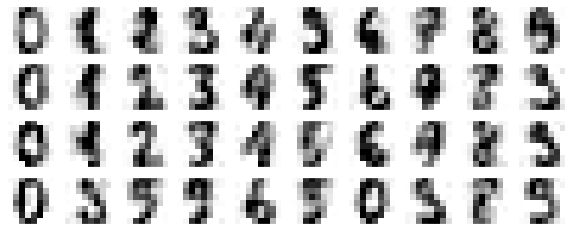

In [131]:
## PCA as Noise filtering

# Idea: 

# Plot few data free of noise:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks': [], # Remove x and y ticks
                                         'yticks': []}
                            )
    for idx, ax in enumerate(axes.flat):
        ax.imshow(data[idx],
                  cmap='binary',
                  clim=(0, 16), # all pixel with original pixel color > 16 will be black
                  interpolation='nearest', # Do not interpolate between pixels.
                                          # Pixels are displayed as a quare of multiple pixels
                                          # (because the display resolution != image resolution)
                                          # Try with 'gaussian' to see the diff
                 )
        
plot_digits(digits.images)

# Plot few data with noise:
np.random.seed(42)
digits_noisy = np.random.normal(digits.images, 4) # Gaussian distribution center at the pixel values with std = 4
plot_digits(digits_noisy)

# Train PCA on noisy data
pca = PCA(0.50) # 50% of the explained variance if kept
pca.fit(digits_noisy.reshape(digits_noisy.shape[0], digits_noisy.shape[1]*digits_noisy.shape[2]))
print(f"Nb of PCA components to keep >= 50% of variance {pca.n_components_}")
# Get the transformed data (12-Dimension)
digits_pca = pca.transform(digits_noisy.reshape(digits_noisy.shape[0], digits_noisy.shape[1]*digits_noisy.shape[2]))
# Inverse the transformed data (64-Dimension)
digits_pca_original = pca.inverse_transform(digits_pca).reshape(digits_noisy.shape[0],
                                                                digits_noisy.shape[1],
                                                                digits_noisy.shape[2])
plot_digits(digits_pca_original)

- clim parameter explanation:

If a certain range of of colorbar in not used in the displayed image, you can use 'clim' to cut off the border:

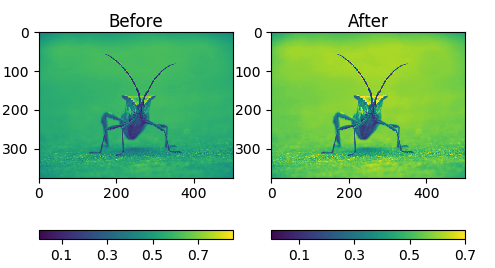

In [132]:
# Example: Eigenfaces, PCA for feature selector

from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


/Users/nicolas/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


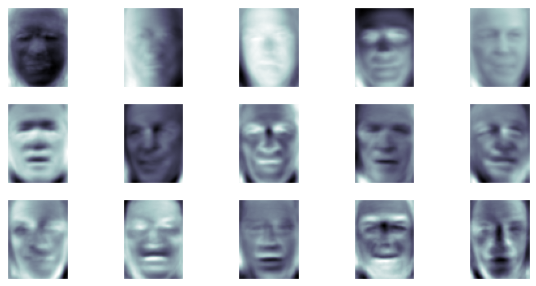

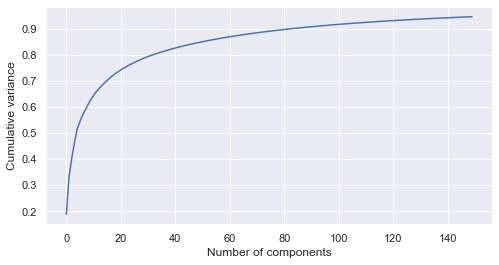

In [160]:
# Because this is a lareg dataset, let's use Randomized PCA to approximate the first N principal components
from sklearn.decomposition import PCA
pca = PCA(n_components= 150,
          svd_solver='randomized', # Approx. Singular Value Decomposition
          )

# Each sample contains 62*47 = 2'914 features
pca.fit(faces.data)

# Visualize the first eigenvectors ("vectors propres" in french)
fig, axes = plt.subplots(3, 5, figsize=(10, 5),
                         subplot_kw = {'xticks': [],
                                       'yticks': []})
for idx, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[idx].reshape(faces.images.shape[1],
                                           faces.images.shape[2]),
              cmap="bone")
    # All the PCA projected images is a linear combination of the eigenvector below
    # Seems that the first eigenvector capture the lightning and angle of the face
    # The latter eigenvector capture faces features like eyes, nose, lips.
    
# Vizualise cumulative variance ratio
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(np.arange(len(pca.components_)),
             np.cumsum(pca.explained_variance_ratio_),
             ax=ax)
ax.set(xlabel = "Number of components",
       ylabel = "Cumulative variance");

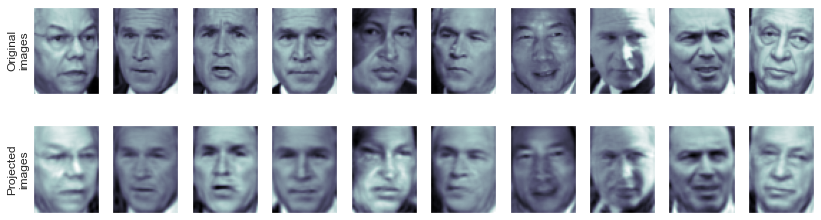

In [179]:
# Vizualized the reduced images
faces_pca = pca.transform(faces.data)
faces_pca_inversed = pca.inverse_transform(faces_pca).reshape(faces.images.shape)

fig, axes = plt.subplots(2, 10, figsize=(14, 4),
                         subplot_kw = {'xticks': [],
                                       'yticks': []})

for idx in range(10):
    axes[0, idx].imshow(faces.images[idx],
              cmap="bone")
    axes[1, idx].imshow(faces_pca_inversed[idx],
              cmap="bone")
    
axes[0, 0].set_ylabel("Original\nimages")
axes[1, 0].set_ylabel("Projected\nimages");



#### Concepts Summary:
    
- PCA: Learn relationship between features
    - "Principal axes": Mean to quantify the relationship
    - "Explained variance": Measure of the variance of the data when projected onto an axis
    -  Nb components to choose -> Look at cumulative explained variance ratio of a function of components
    
    
- How are mathematically "principal axes" computed ? 